<img src="./logo_UNSAM.jpg" align="right" width="150" />  

#### Análisis y Porcesamiento de Señales

# Trabajo Práctico Nº4
#### Catalina Re


A partir de tres tipos de señales:
- Electrocardiograma (ECG): estudio que detecta señales eléctricas generados por le corazón, que luego se amplifican y se representan gráficamente como ondas que reflejan cada latido y fase del ciclo cardíaco.
- Pletismografía (PPG): técnica no invasiva que mide los cambios en el volumen sanguíneo en los tejidos y vasos sanguíneos.
- Audio.
Se realizó una estimación de la densidad espectral de potencia (PSD) de cada señal a partir del método Welch. Luego, se realizó una estimación del ancho de banda de cada señal. 

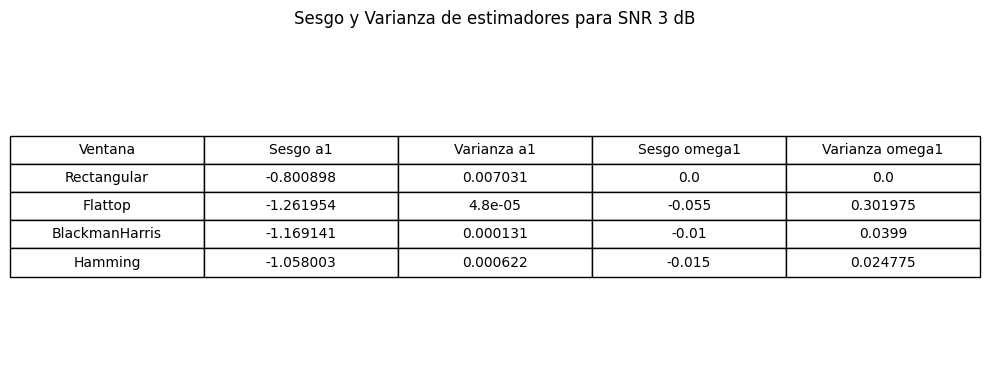

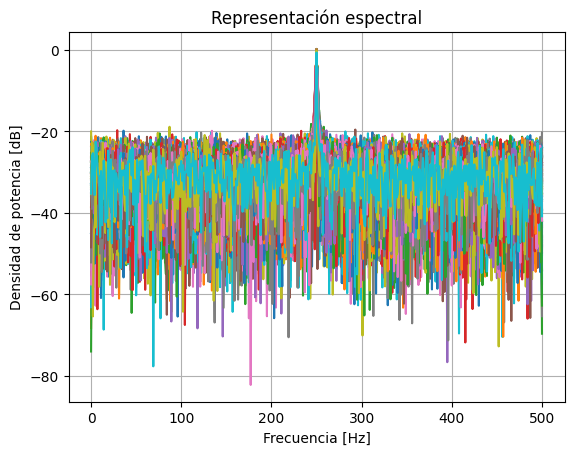

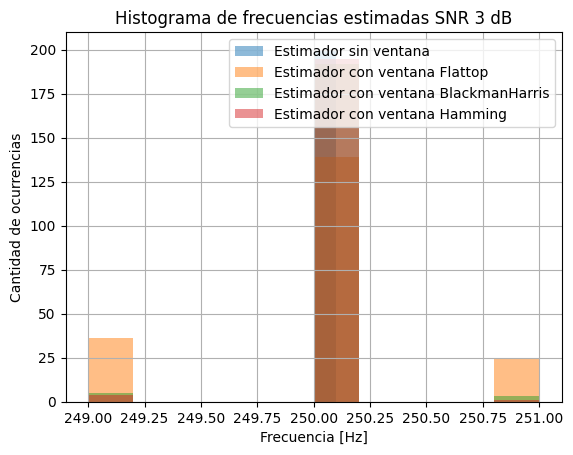

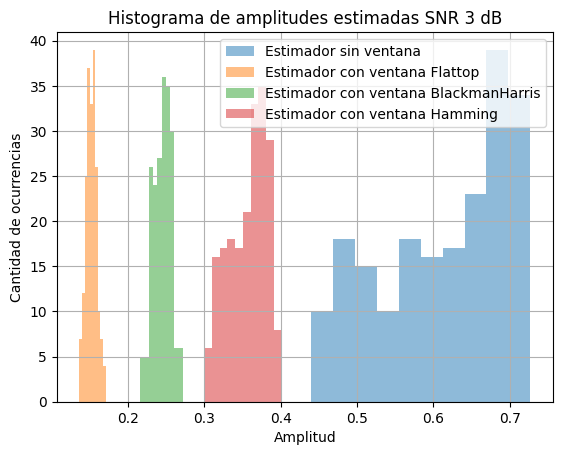

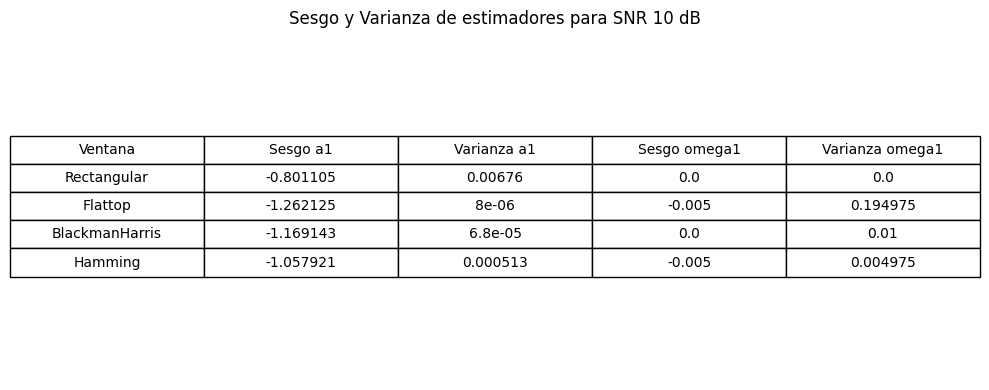

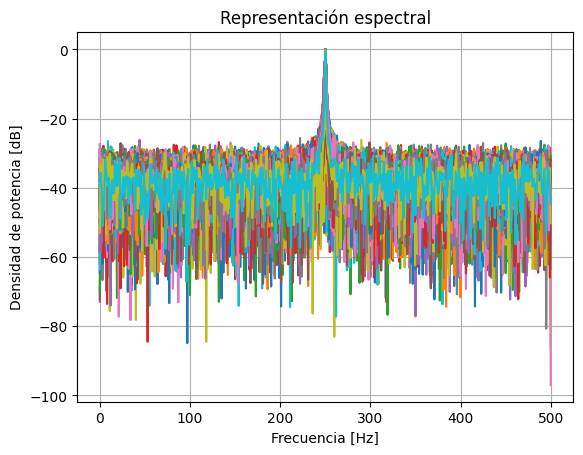

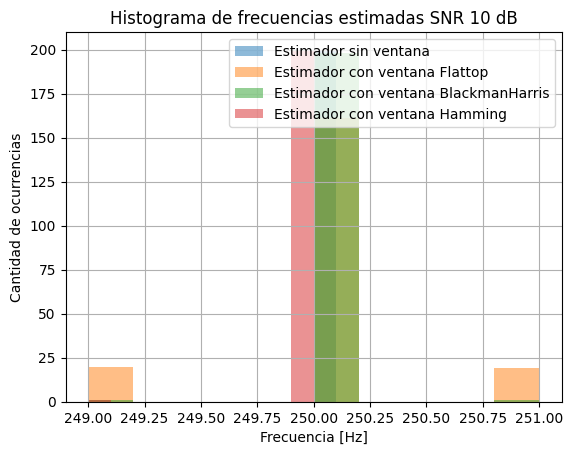

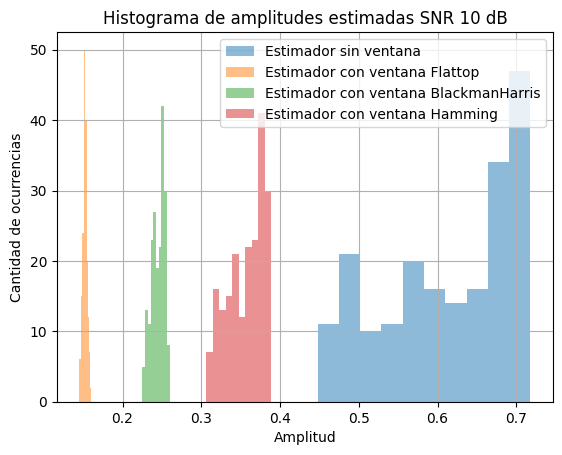

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 26 18:59:24 2025

@author: Catalina Re
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#%%Datos y funciones
N=1000 #numero de muestras
R=200 #realizaciones
SNR=[3, 10]
fs=1000 #frecuencia de muestreo
ts=1/fs #tiempo de muestreo
df=fs/N #resolución espectral
omega0=fs/4
a1=np.sqrt(2) #para obtener potencia 1W

def omega_estimada (_ft, N, df): #estimador de frecuencia, donde el espectro tiene máximo
    ft_abs=np.abs(_ft[:N//2, :])
    omega_est=np.argmax(ft_abs, axis=0)*df
    return omega_est

#%%Señal

tt=np.linspace(0, (N-1)*ts, N).reshape((1000,1)) #vector (grilla) del tiempo que cambio a una matriz de dos dimensiones [1000x1]
tt=np.tile(tt, (1,R)) #tt pasa a tener forma [1000xR]

ff=np.linspace(0, (N-1)*df, N) #vector de frecuencias
fr=np.random.uniform(-1/2,1/2, size=(1,R)) #desplazamiento

omega1=omega0+fr*df

sen=a1*np.sin(2*np.pi*omega1*tt)

#Ventanas
#Flattop
w1=signal.windows.flattop(N).reshape((N,1)) #[1000,1]
#Blackmanharris
w2=signal.windows.blackmanharris(N).reshape((N,1)) #[1000,1]
#Hamming
w3=signal.windows.hamming(N).reshape((N,1)) #[1000,1]

frs=np.fft.fftfreq(N, ts)

for snrdB in SNR:
    pot_ruido_analog=10**(-snrdB/10) #señal analógica
    sigma=np.sqrt(pot_ruido_analog)
    nn=np.random.normal(0,sigma, (N,R)) #ruido analógico
    
    xx=sen+nn #[1000x200]
    
    #ventaneo
    xw1=xx*w1
    xw2=xx*w2
    xw3=xx*w3
    #y xx que seria con ventana rectangular
    
    #transformadas
    ft_xx=1/N*np.fft.fft(xx, axis=0) #axis=0 --> aplicar la FFT a lo largo de las filas, columna por columna
    ft_xw1=1/N*np.fft.fft(xw1, axis=0)
    ft_xw2=1/N*np.fft.fft(xw2, axis=0)
    ft_xw3=1/N*np.fft.fft(xw3, axis=0)
    
    #estimador de amplitud
    a1_e=np.abs(ft_xx[N//4, :]) #sin ventana
    a1_e1=np.abs(ft_xw1[N//4, :]) #flattop
    a1_e2=np.abs(ft_xw2[N//4, :]) #blackmanharris
    a1_e3=np.abs(ft_xw3[N//4, :]) #hamming
    
    #estimador de frecuencia
    omega_est0=omega_estimada(ft_xx, N, df) #sin ventana
    omega_est1=omega_estimada(ft_xw1, N, df) #flattop
    omega_est2=omega_estimada(ft_xw2, N, df) #blackmanharris
    omega_est3=omega_estimada(ft_xw3, N, df) #hamming
    
    #sesgo y varianza de estimador de amplitud
    es_a1_xx=np.mean(a1_e)
    es_a1_xw1=np.mean(a1_e1)
    es_a1_xw2=np.mean(a1_e2)
    es_a1_xw3=np.mean(a1_e3)
    
    sesgo_a1_xx=es_a1_xx-a1
    sesgo_a1_xw1=es_a1_xw1-a1
    sesgo_a1_xw2=es_a1_xw2-a1
    sesgo_a1_xw3=es_a1_xw3-a1
    
    varianza_a1_xx=np.var(a1_e)
    varianza_a1_xw1=np.var(a1_e1)
    varianza_a1_xw2=np.var(a1_e2)
    varianza_a1_xw3=np.var(a1_e3)
    
    #sesgo y varianza de estimador de frecuencia
    es_omega1_xx=np.mean(omega_est0)
    es_omega1_xw1=np.mean(omega_est1)
    es_omega1_xw2=np.mean(omega_est2)
    es_omega1_xw3=np.mean(omega_est3)
    
    sesgo_omega1_xx=es_omega1_xx-omega0
    sesgo_omega1_xw1=es_omega1_xw1-omega0
    sesgo_omega1_xw2=es_omega1_xw2-omega0
    sesgo_omega1_xw3=es_omega1_xw3-omega0
    
    varianza_omega1_xx=np.var(omega_est0)
    varianza_omega1_xw1=np.var(omega_est1)
    varianza_omega1_xw2=np.var(omega_est2)
    varianza_omega1_xw3=np.var(omega_est3)
    
    #tabla
    ventanas=['Rectangular', 'Flattop', 'BlackmanHarris', 'Hamming']
    sesgo_a=[sesgo_a1_xx,sesgo_a1_xw1,sesgo_a1_xw2,sesgo_a1_xw3]
    varianza_a=[varianza_a1_xx,varianza_a1_xw1,varianza_a1_xw2,varianza_a1_xw3]
    sesgo_o=[sesgo_omega1_xx,sesgo_omega1_xw1,sesgo_omega1_xw2,sesgo_omega1_xw3]
    varianza_o=[varianza_omega1_xx,varianza_omega1_xw1,varianza_omega1_xw2,varianza_omega1_xw3]
    
    tabla=[]
    for i in range(len(ventanas)):
        fila= [
            ventanas[i],
            round(sesgo_a[i], 6),
            round(varianza_a[i], 6),
            round(sesgo_o[i], 6),
            round(varianza_o[i],6)
        ]
        tabla.append(fila)
        
    #mostrar tabla
    fig, ax=plt.subplots(figsize=(10,2+len(tabla)*0.5))
    ax.axis('off')
    tabla2=ax.table(
        cellText=tabla,
        colLabels=['Ventana', 'Sesgo a1', 'Varianza a1', 'Sesgo omega1', 'Varianza omega1'],
        loc='center',
        cellLoc='center',
        colLoc='center'
        )
    tabla2.auto_set_font_size(False)
    tabla2.set_fontsize(10)
    tabla2.scale(1,1.5)
    
    plt.title('Sesgo y Varianza de estimadores para SNR {} dB'.format(snrdB))
    plt.tight_layout()
    plt.show()
    
    #gráficos
    #espectro
    plt.figure(2)
    bfrec=ff<=fs/2 
    plt.plot(ff[bfrec], 10*np.log10(2*np.abs(ft_xx[bfrec, :])**2))
    plt.title('Representación espectral')
    plt.ylabel('Densidad de potencia [dB]')
    plt.xlabel('Frecuencia [Hz]')
    plt.grid(True)
    
    #histograma
    plt.figure(3)
    plt.hist(omega_est0, bins=10, alpha=0.5, label='Estimador sin ventana')
    plt.hist(omega_est1, bins=10, alpha=0.5, label='Estimador con ventana Flattop')
    plt.hist(omega_est2, bins=10, alpha=0.5, label='Estimador con ventana BlackmanHarris')
    plt.hist(omega_est3, bins=10, alpha=0.5, label='Estimador con ventana Hamming')
    plt.title("Histograma de frecuencias estimadas SNR {} dB".format(snrdB))
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Cantidad de ocurrencias")
    plt.grid(True)
    plt.legend()
    
    plt.figure(4)
    plt.hist(a1_e, bins=10, alpha=0.5, label='Estimador sin ventana')
    plt.hist(a1_e1, bins=10, alpha=0.5, label='Estimador con ventana Flattop')
    plt.hist(a1_e2, bins=10, alpha=0.5, label='Estimador con ventana BlackmanHarris')
    plt.hist(a1_e3, bins=10, alpha=0.5, label='Estimador con ventana Hamming')
    plt.title("Histograma de amplitudes estimadas SNR {} dB".format(snrdB))
    plt.xlabel("Amplitud")
    plt.ylabel("Cantidad de ocurrencias")
    plt.grid(True)
    plt.legend()
    plt.show()

Con los gráficos espectrales se puede observar que al graficar todos los espectros juntos, las señales presentan una mayor dispersión alrededor de la frecuencia central a menor SNR (3 dB) y menor dispersión a mayor SNR (10 dB). Sin ventana (o rectangular) aparece una mayor dispersión de energía a frecuencias adyacentes. Y ventanas como la Flattop y Blackman Harris reducen esta dispersión pero ensanchan el pico principal.
Con respecto a los histogramas de frecuencias estimadas, para SNR de 3 dB dichas frecuencias están más dispersas (histograma más ancho), y para SNR de 10 dB, las frecuencias estimadas se agrupan más cerca de la verdadera ($\Omega_0=\frac{\pi}{2}$). Las ventanas ayudan a mejorar la precisión reduciendo el error, aunque Flattop puede aumentar un poco el sesgo.
Los histogramas de amplitudes muestran que sin ventanas, las estimaciones de amplitud tienen mayor varianza. En cambio, las ventanas bien diseñadas para mediciones de amplitud mejoran notablemente el sesgo de amplitud (aunque sacrifican algo de resolución espectral).